# lab5b, 2/21/19: PCA

## PCA, "Iris dataset", and the pleasures (and hubris) (and poverty) of classification

## today:

1. Pearson, Spearman, and Intelligence
2. PCA & Dimensionality Reduction
3. A) Attending to the flowers: PCA and the Iris data set
3. B) Inventing IQs: PCA and Spearman data set
4. Choose your own adventure...




In [24]:
# Some libraries we'll need...

import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA 
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import re
import text_analysis as ta  #this library provides "generate colors" function to color code data points in PCA plots

### Part 1: PCA and Intelligence Measuring

#### 1. Pearson, Spearman, and Intelligence 
- See Desrosieres, *The Politics of Large Numbers*, chap 4, 145-146.
- See also C. Spearman, "'General Intelligence,' Objectively Determined and Measured", *The American Journal of Psychology* 15, no 2 (Apr., 1904), 201-292.

Imagine that, like Spearman, you want to try to measure intelligence: and, again following Spearman's lead, you think that there's multiple kinds of intelligences one can have and produce a test to measure each of these kinds of intelligence. (There could be many reasons why you think there's 7 kinds of intelligence rather than 122 kinds or 2 kinds--but any reasons we *do* provide will depend on some conception of culture. More to the point, any definition of *intelligence* is always political.)

Let's say, for the sake of this example, that you believe there are 7 distinct kinds of intelligence. Thus, for each person, you have an array of 7 observations: $I_1, I_2, I_3,...I_7$. You'd like to understand (1) how the individual relates to a population and (2) how the entire sample population is distributed. If you think that each kind of intelligence is as important as every other kind of intelligence, you might give each $I_i$ its own dimension, giving you a 7-dimensional plot, which is very difficult to visualize or draw:

![7-features](./fig/7-features.jpeg)

Since it's difficult to visualize anything more than 3 dimensions, and it's usually much easier to visualize something in 2 dimensions, we'd like a way to squeeze this 7-dimensional data into 2-dimensions (or, in the case of Spearman, to squeeze the data into 1-dimension). How might we visualize this 7-dimensional data while retaining the distinctive patterns in the data? 

#### 2. PCA & Dimensionality Reduction
Let's say we have a lot of different kinds of observations for a particular kind of "object" (e.g., flowers, people, cars, GDPs, statistical entities...) and we want to compare them to *classify* and *then take action*.

<b>1. Writing down the data</b>

To continue our earlier example, to combine different "intelligences" of a particular person $p_i$, we write down each attribute with its corresponding dimension (which is easy to write mathematically though it is difficult to draw):

$p_i = I_1 + I_2 + I_3 + I_4 + I_5 + I_6 + I_7$

where each $I_i$ is a vector that is [orthogonal](https://en.wikipedia.org/wiki/Orthogonality) to every other $I_i$.

Our sample population is $\sum_{i = 1}^{n}p_i$

<b>2. Identify a new 2-dimensional subspace from the data</b>
Next, we determine a line that maxmizes the variance in the 7-dimensional data (i.e., we produce a line via the method of least squares), and label this line "principal component 1" or just "PC 1". We also produce a second line that is perpendicular to PC 1 and that also maximized the variance in the 7-dimensional data--we label this second line "principal component 2" or just "PC 2". 

Using PC 1 and PC 2, we define a new 2-dimensional subspace and plot all the data as *projections* into this new subspace. (Note: we're losing some data by doing this!)


<hr>

<b> For the more mathematically-inclined, we're doing the following:</b> 
1. Computing eigenvectors and eigenvalues from a covariance or correlation matrix
2. Sorting eigenvalue from greatest to lowest, and pick the the greatest corresponding eigenvectors for the number of K dimensions we want (in our case, just 2 dimensions)
3. Constructing a new subspace of 2 dimensions from the first two greatest eigenvectors we selected in step 2.
4. Projecting data into the new subspace we created in step 3.   

For a more detailed discussion of the math involved, see [here](https://plot.ly/ipython-notebooks/principal-component-analysis/#PCA-and-Dimensionality-Reduction)


#### 3a. Stop and observe the flowers: The famous Iris data set

First, where did this data set come from? How many features does it describe? How was the data collected and to what purpose?

For details about the contents of the data set, see https://archive.ics.uci.edu/ml/datasets/Iris/. 

For details about the historical origins of the data set, see here: https://en.wikipedia.org/wiki/Iris_flower_data_set. The dataset was popularized (but apparently not originally produced) in R. A. Fisher's "The use of multiple measurements in taxnomic problems," *Annual Eugenics* 7, Part II, 179-188 (1936); see also in *Contributions to Mathematical Statistics* (John Wiley, NY, 1950). 

In [25]:
## Quick way to ingest CSV data from ML data repository.
flowers = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

#rename column headings
flowers.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

#cleans NA entries 
flowers.dropna(how="all", inplace=True) # drops the empty line at file-end

#Let's inspect the dataset directly via panda's head()
flowers.head() #here we can see how the csv is structured

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
# And here we can see that it's composed of 50-samples 
# of 3 kinds of flower, with 4 features per flower. Note
# that we have no missing values in the data set! Yay! 

flowers.groupby(by="class").count()

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [38]:
## make table of iris data X 

# Note that .ix[] here is a "label-location based indexer" function
# for comparsion between .ix, .iloc, and .loc, see http://stackoverflow.com/questions/31593201/pandas-iloc-vs-ix-vs-loc-explanation
iris_X = flowers.iloc[:,0:4].values #take all rows and the first 4 columns (in this case, the features)

In [39]:
#...and class labels Y (as an array)
label_of_flower = flowers['class'].tolist()

In [40]:
# perform pca, pick number of dimensions...
iris_pca_model = sklearnPCA(n_components=2)
iris_pca_coordinates = iris_pca_model.fit_transform(iris_X)

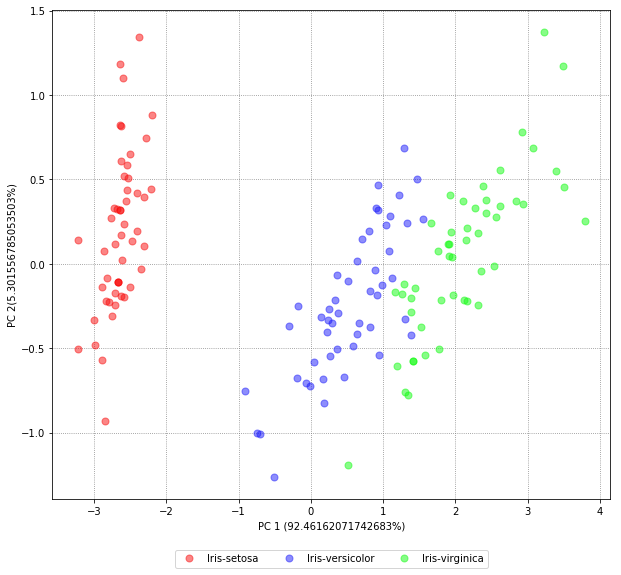

In [42]:
## PLOT IRIS DATA  ------
## RUN TWICE TO GET IT TO DISPLAY PROPERLY (this is a bug in matplotlib)

# GENERATE COLORS FOR PLOT ---
## randomly pick RBG colors for each "class"
number_of_flower_classes = 3 #change based on how many documents you have
colors = ta.generate_colors(3) #list of colors


# ASSIGN COLORS FOR EACH IRIS FLOWER --- 
colors_for_flowers = []
color_index = []
unique_label = list(set(label_of_flower))
for flower in label_of_flower:
    for kind in range(0, len(unique_label)):
        if flower == unique_label[kind]:
            color_index.append(kind)
            #print(colors[kind])
            colors_for_flowers.append(colors[kind])
            break

# PLOT PCA DATA --- 
## plot actual PCA data
label_seen = set()
for flower in range(0, len(iris_pca_coordinates)):
    plt.plot(iris_pca_coordinates[flower, 0], iris_pca_coordinates[flower, 1], 'o', markersize =7, alpha=0.5, color=colors_for_flowers[flower], label=label_of_flower[flower] if label_of_flower[flower] not in label_seen else None)
    label_seen.add(label_of_flower[flower])
##plot labels   
plt.xlabel('PC 1 ('+str(iris_pca_model.explained_variance_ratio_[0]*100)+'%)') #x-axis title
plt.ylabel('PC 2('+str(iris_pca_model.explained_variance_ratio_[1]*100)+'%)') #y-axis title
plot_size = 10 # change to change plot size
matplotlib.rcParams['figure.figsize'] = (plot_size, plot_size) #size of graph generated in notebook

##legend generation
plt.legend()  #generate legend explicitly
ax = plt.subplot(111) #used in making legend
plt.xlabel
plt.grid(b=True, which='major', color='gray', linestyle='dotted') # Add gridlines
## legend placement (outside of plot)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9]) ## Shrink current axis's height by 10% on the bottom
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.15), fancybox=True, shadow=False, ncol=5) # Put a legend below current axis
plt.show()

<b>What have we done here?</b> We've taken for features for each flower (sepal length & width, petal length & width), and found a way to project this 4-dimensional data into the 2-dimensional plot above. 

Note that nearly 92.5% of the variance is "described" (i.e., fitted) by PC 1, but only 5.3% of the variance is described by PC 2. That means the graph above describes about 97.8% of the variance in the data! If we have confidence in the data, we may be confident that we've retained meaningful struture of the data, despite the fact that we have "judiciously" thrown out data... 

###### 3a. Inventing Intelligence and exploratory data analysis

Spearman argues that there is a
> relation of _any common and essential element in the Intelligences to any common and essential element in the Sensory Functions._ For brevity, we term these common elements "General Intelligence" and "General Discrimination[...]"[1]

He is arguing that "from several observed correlations we are able to deduce a single true one" and that "this latter alone is of real scientific significance".[2] Let's use principal component analysis to explore his data and consider his claimed correlations between "general discrimination" and "general intelligence." 

<small>[1] Spearman, "General Intelligence," Objectively Determined and Measured," _American Journal of Psychology_ 15, no. 2 (1904): 201-292.

[2] Spearman, 256.</small>

Let's begin by taking Spearman's data for school children as reported by Spearman (see page 286, "series I"), which we provide in the following file:

In [48]:
SpearmanObservations = pd.read_csv(
    filepath_or_buffer='./dat/spearman-286-seriesI.csv', 
    sep=',')

SpearmanObservations

,sex,age,pitch,light,weight,common sense A,common sense B,cleverness
0,f,11.500,8,4,4,6,5,2
1,m,12.916,15,3,4,11,7,22
2,f,12.666,14,6,4,16,10,7
3,f,13.666,13,4,9,1,1,1
4,m,11.333,5,14,7,3,2,3
5,f,11.916,25,7,4,10,14,9
6,f,11.250,10,19,8,8,19,12
7,f,13.083,10,12,10,2,4,6
8,m,12.416,18,11,9,5,6,11
9,m,12.583,14,30,7,21,22,19


Now we produce the same plot that we did above for the iris data:

/usr/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


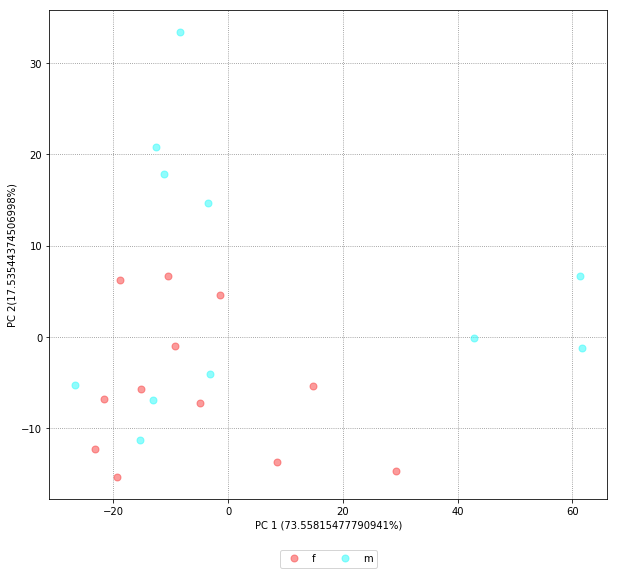

In [50]:
## MAKE LIST OF SPEARMAN DATA ------
# for comparsion between .ix, .iloc, and .loc, see http://stackoverflow.com/questions/31593201/pandas-iloc-vs-ix-vs-loc-explanation
spearman_data_X = SpearmanObservations.iloc[:,2:7].values #take all rows and the last 6 columns (i.e., we throw out sex and age)

#...and class labels Y (as an array)
spearman_labels = SpearmanObservations['sex'].tolist()

# perform pca, push 6 kinds of observations into 2 dimensions (i.e., a two-axis plot) 
pca_model = sklearnPCA(n_components=2)
pca_coordinates = pca_model.fit_transform(spearman_data_X)

## PLOT IRIS DATA -----
## RUN TWICE TO GET IT TO DISPLAY PROPERLY (this is a bug in matplotlib)

# GENERATE COLORS FOR PLOT ---
## randomly pick RBG colors for each "class"
number_of_classes = 2  # data set lists "male" and "female" 
colors = ta.generate_colors(2) # make list of colors

# ASSIGN COLORS FOR EACH SEX --- 
colors_for_sex = []
color_index = []
unique_label = list(set(spearman_labels))
for sex in spearman_labels:
    for kind in range(0, len(unique_label)):
        if sex == unique_label[kind]:
            color_index.append(kind)
            #print(colors[kind])
            colors_for_sex.append(colors[kind])
            break

# PLOT PCA DATA --- 
## plot actual PCA data
label_seen = set()
for person in range(0, len(pca_coordinates)):
    plt.plot(pca_coordinates[person, 0], pca_coordinates[person, 1], 'o', markersize =7, alpha=0.5, color=colors_for_sex[person], label=spearman_labels[person] if spearman_labels[person] not in label_seen else None)
    #plt.plot(pca_coordinates[person, 0], pca_coordinates[person, 1], 'o', markersize =7, alpha=0.5, label=spearman_labels[person] if spearman_labels[person] not in label_seen else None)
    label_seen.add(spearman_labels[person])
##plot labels   
plt.xlabel('PC 1 ('+str(pca_model.explained_variance_ratio_[0]*100)+'%)') #x-axis title
plt.ylabel('PC 2('+str(pca_model.explained_variance_ratio_[1]*100)+'%)') #y-axis title
plot_size = 10
matplotlib.rcParams['figure.figsize'] = (plot_size, plot_size) #size of graph generated in notebook

##legend generation
plt.legend()  #generate legend explicitly
ax = plt.subplot(111) #used in making legend
plt.xlabel
plt.grid(b=True, which='major', color='gray', linestyle='dotted') # Add gridlines
## legend placement (outside of plot)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9]) ## Shrink current axis's height by 10% on the bottom
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.15), fancybox=True, shadow=False, ncol=5) # Put a legend below current axis
plt.show()

#### Some observations regarding our PCA graph and Spearman's data:

(1) Men and women do not appear to be very representative (men exist at extremes; women loosely cluster). It's surprising that Spearman wouldn't have been surprised by this distribution in which mens traits are more extreme. We haven't actually interrogated how Spearman's data was created here, but there is little reason to trust his observations. In any case, this is certainly a shockingly small number of individuals to argue for his existential claims about "general intelligence."  

(2) We find that the first principal component "describes" 73.6% of variance, but that the second still "describes" 17.5%. Not a strong case for a single "unity" of cause. Furthermore, the total variance being shown in the graph is only 91.094%. That means there are still a number of other axes (not shown) that are describing the remaining 9% of the data. This is suggestive that Spearman's claims of one "general intelligence" is not very strongly supported by even his own data.    

(3) We haven't included age, but if you rerun the above analysis and include age, it doesn't change the results much. His data set spans roughly 3.8 years of difference in observed ages. And yet, 3.8 years is a fairly large distribution of ages for a single class. What exactly are the circumstances in which this range of ages has arisen? And what individuals were thrown out? (These should also be reported, but Spearman does not do this.) 

#### 4. Choose your own adventure...

Now that you've seen how to do PCA, it's time for you to try it out on a data set of your choosing. 

First, go the [machine learning repository](https://archive.ics.uci.edu/ml/datasets.html?format=&task=cla&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table) and pick a data set you'd like to examine. 

Next, to download the data set directly into Pandas, INSERT THE ADDRESS FOR THE DATA SET YOU CHOOSE BELOW. (The address should end with ".data".) 

In [52]:
## Quick way to ingest CSV data from ML data repository.
## uncomment code below and change .data file 


#your_df = pd.read_csv(
#    filepath_or_buffer='repository_address_that_ends_in_.data', #CHANGE 
#    header=None, 
#    sep=',')

Now rename your column labels to make it easier to manipulate...

In [54]:
## rename column headings
## Uncomment code below to use and change as appropriate

# your_df.columns=[INSERT_YOUR_NEW_COLUMN_LABELS_HERE--where_each_column_is_separated_by_commas]

Use the Iris example above to perform PCA on your data below. 

In [55]:
# INSERT YOUR PCA CODE HERE